# Image Tutorial

本教程主要讲，如何使用matplotlib绘制image图片；这里的`image`不是我们平时见到的RGB编码的图片，matplotlib绘制的`image`是基于矩阵数据进行绘制的；也可以将RGB的图片转码成numpy矩阵，然后对矩阵进行操作就

> 需要注意的是matplotlib中只支持png图片的加载，如果要获得其他类型图片的数据，则需要` Pillow`包的支持

### 下面让我们来对这张小虫子的图片来一番操作

![虫子](../stinkbug.png)

>  RGB色彩模式是工业界的一种颜色标准，是通过对红(R)、绿(G)、蓝(B)三个颜色通道的变化以及它们相互之间的叠加来得到各式各样的颜色的，RGB即是代表红、绿、蓝三个通道的颜色，这个标准几乎包括了人类视力所能感知的所有颜色，是运用最广的颜色系统之一。<引自百度百科>


这是一种RGB的PNG图片，它的分辨率为500x375;通俗的讲就是这张PNG的图片数据包含有`500X375`个点；每个点通过一个RGB代码表示出一种颜色。这张图片的每个点是一个24位的二进制代码,其中每8位二进制代码表示一个颜色的编码；如果是RGB是32位的编码的话，matplotlib会将它缩放到24位，在计算每种颜色的编码，颜色编码范围在`0~1`之间。

例如通过matplotlib读取png图片后，每个像素的RGB代码表示成一个数组`[0.40784314 0.40784314 0.40784314]`



                                        

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mping 
'''
导入Image 所需要的包
'''

img=mping.imread("../stinkbug.png")
#print(img.shape)
#(375, 500, 3)
print(img)



[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


### 打印矩阵数据

在使用`mping.imread`获取到PNG图片的编码矩阵后，可以使用`plt.imshow()`将矩阵数据显示成图片，并且多了两个坐标轴，坐标轴的刻度是以像素为单位的。
+ 横坐标是图片原始的宽度
+ 纵坐标是图片高度

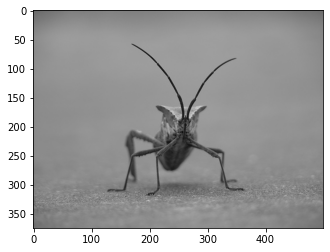

In [73]:
plt.imshow(img) ##显示图片

### 对原始矩阵进行操作

+ 截取部分图片
+ 改变图片原始的RGB代码

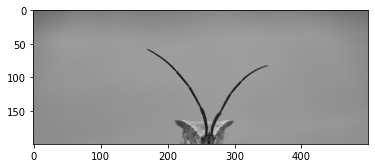

In [92]:
import numpy as np
##截取200行，400列的矩阵；实际上相当于图片高度变成200，宽度变成400
plt.imshow(img[0:200,0:600,]) ##矩阵的切片操作

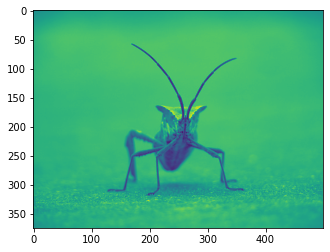

In [79]:
## 改变RGB编码，我这里只截取了RGB数组中的一个维度
## 对于图片大小我没有进行修改
plt.imshow(img[:,:,1])

### 将颜色进行映射
如果你的每个像素点中，只有一个数字代表它是什么颜色，同样可以使用`imshow`函数中封装好的映射函数将一维的数据映射成3维的数据点

例如我将img矩阵中的RGB编码，压缩到一维空间，再使用`cmap=hot`，< color maping >的缩写将一维空间重新映射到三维空间后的图片，搞了两种映射。
既可以使用函数中的参数进行设置，也可以使用对象的属性进行设置
+ `Greys`这个有点像x光片
+ `hot` 这个有点像热成像

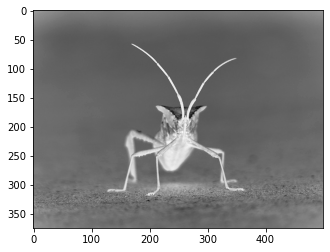

In [87]:
plt.imshow(img[:,:,1],cmap='Greys') ##按照灰色进行映射

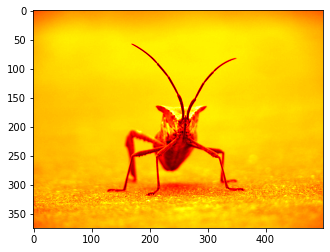

In [96]:
imgplot=plt.imshow(img[:,:,1]) ##返回一个image对象
imgplot.set_cmap('hot')  ##调用属性进行设置hot映射

### 添加图例，描述颜色深浅

直接使用`plt.colorbar()`函数即可；
当然有时候我们可以通过设置颜色映射时的上下限，来增加我们感兴趣的地方的对比度；从而突出重点


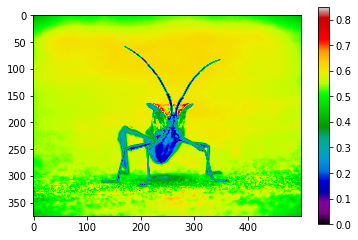

In [95]:
imgplot=plt.imshow(img[:,:,1]) ##返回一个image对象
imgplot.set_cmap('nipy_spectral')  ##调用属性进行设置hot映射
plt.colorbar()  ##添加图例

### 改变颜色映射规则
当然有时候我们可以通过设置颜色映射时的上下限，来增加我们感兴趣的地方的对比度；从而突出重点
使用`clim`函数进行操作，同样可以使用对象的方法`set_clim`

在设置了颜色的映射范围之后，增强你感兴趣的地方的对比度；可以发现在经过调整后，B图中有些peak值出，对比度更亮了




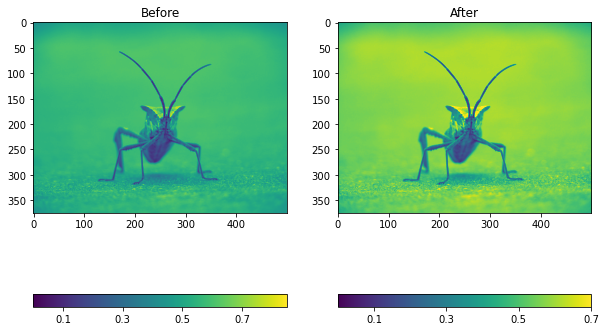

In [111]:
fig=plt.figure(figsize=(10,10)) ##创建一个画板
a=plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1) ##创建一个图层
imgplot=plt.imshow(img[:,:,1])
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal') ##设置图例位置和刻度线
b=plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1) ## 创建一个图层
imgplot=plt.imshow(img[:,:,1])
imgplot.set_clim(0,0.7)
b.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

### 打马赛克
使用`Pillow`包对图片的RGB数据进行扰动。

```python

pip3 install pillow
```

例如当图片像素发生改变时，必然会有像素点的丢失和新像素点的获得。在保持图片的整体特征不变的情况下，对图片的像素点进行处理方案又有好多种；在图片缩小时，丢弃掉一些像素点；在图片放大时，插入一些像素点。

这里借助`pillow`包将图片缩小64x48个像素；但是当你以原有的尺寸来看这张图片，就相当于打了一层马赛克；因为有原图中的一些像素被丢弃了。如果图片缩写这看，估计也就是个缩略图


(500, 375)
(64, 48)


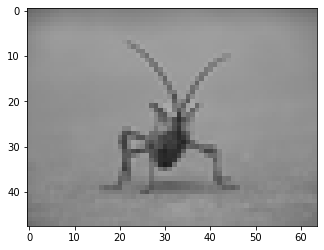

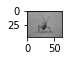

In [120]:
from PIL import Image

img = Image.open('../stinkbug.png')
print(img.size)
(500, 375)
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
print(img.size)
#(64, 48)
imgplot = plt.imshow(img)

fig=plt.figure(figsize=(0.64,0.48))
imgplot = plt.imshow(img)

### 参考
1. [matplotlib](https://matplotlib.org/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py)
2. [数组切片](https://www.cnblogs.com/Sinte-Beuve/p/6573246.html)
3. [pillow](https://blog.csdn.net/MiniCatTwo/article/details/80557109)